## Analysis and Visualization of Complex Agro-Environmental Data
### 1st Test - 4 April 2025 - Part 2

Full name: Mekaela Jade Stevenson

Student number: 28525

Preliminary steps:

1. Import the necessary packages:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import zipfile
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot
import math


2. Import the file named 'greenhouse_gas_inventory_data.zip' from here: https://github.com/isa-ulisboa/greends-avcad-2025/tree/main/examples to a Pandas Dataframe. 

The dataset is the Greenhouse Gas (GHG) Inventory Data, which contains information on anthropogenic emissions (in *kilotonne_co2_equivalent*) by sources of the following GHGs (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), unspecified mix of HFCs and PFCs, sulphur hexafluoride (SF6) and nitrogen triflouride (NF3)) that are not controlled by the Montreal Protocol.
It includes the following variables:


| Index  | Variable           | Type                       | Description |
|--------|--------------------|----------------------------|-------------|
|0       | country_or_area    | Categorical variable       | Country name
|1       |year                |Integer                     |Year
|2       |value               |Continuous                  |GHG emmision value
|3       |category            |Categorical                 |Type of GHG




In [4]:
df = pd.read_csv('./greenhouse_gas_inventory_data.csv', sep=",")

In [5]:
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


##### Q1 - Explore the dataset, including the number of records, variable names, and the presence of missing values.

In [6]:
df.describe()

,year,value
count,8406.000000,8.406000e+03
mean,2002.188437,2.055472e+05
std,7.151605,8.041504e+05
min,1990.000000,1.103750e-06
25%,1996.000000,2.976980e+02
50%,2002.000000,7.840318e+03
75%,2008.000000,6.589885e+04
max,2014.000000,7.422208e+06


In [8]:
df.columns

Index(['country_or_area', 'year', 'value', 'category'], dtype='object')

In [9]:
df.isnull().sum()

country_or_area    0
year               0
value              0
category           0
dtype: int64

##### Q2 - Plot the mean GHG emission values of CO<sub>2</sub> per country. Include an error bar.
(NOTE:The CO<sub>2</sub> emission is coded in the variable named `category` as `carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent`).

In [10]:
# make df for only this category
df_co2 = df[(df['category']=='carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent')]
df_co2.head(5)


,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [63]:
mean_co2 = df_co2.groupby('country_or_area').mean('value')
mean_co2

,year,value
country_or_area,,
Australia,2002.0,3.542080e+05
Austria,2002.0,6.892309e+04
Belarus,2002.0,6.371334e+04
Belgium,2002.0,1.195297e+05
Bulgaria,2002.0,5.222841e+04
Canada,2002.0,5.410325e+05
Croatia,2002.0,2.027852e+04
Cyprus,2002.0,6.918025e+03
Czech Republic,2002.0,1.252604e+05


In [72]:
std = df_co2['value'].std()


np.float64(1059768.175824186)

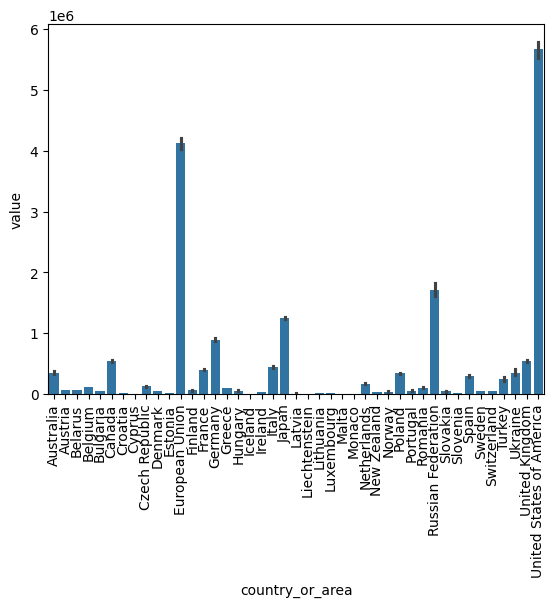

In [78]:
sns.barplot(data=df_co2, x='country_or_area', y='value')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# not super sure on the error bar, not working, so started a draft
plt.errorbar(df_co2['value'].count(), df_co2['value'].mean(), yerr=std, fmt='-o', capsize=5, label="Mean Temp_ann ± Std Dev")

would also be better ordered, but ran out of time

##### Q3 - Compute the mean, minimum, maximum, quartiles and standard deviation of GHG emmission values of CO<sub>2</sub> (carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent) separately for Portugal and Greece.

In [44]:
# Portugal and Greece
df_portugal_greece = df_co2[(df_co2['country_or_area']=='Portugal') | 
   (df_co2['country_or_area']=='Greece')
   ]

df_portugal_greece.describe()

,year,value
count,50.000000,50.000000
mean,2002.000000,77213.370592
std,7.284314,21931.207074
min,1990.000000,45809.071410
25%,1996.000000,56091.707536
50%,2002.000000,74831.401904
75%,2008.000000,96302.048066
max,2014.000000,114127.554271


In [45]:
# For Portugal
df_portugal = df_co2[(df_co2['country_or_area']=='Portugal')
   ]

df_portugal.describe()

,year,value
count,25.000000,25.000000
mean,2002.000000,57668.976503
std,7.359801,7854.713780
min,1990.000000,45809.071410
25%,1996.000000,51303.204149
50%,2002.000000,55454.211057
75%,2008.000000,65465.419716
max,2014.000000,70034.529408


In [46]:
#  For greece
df_greece = df_co2[(df_co2['country_or_area']=='Greece')
   ]

df_greece.describe()

,year,value
count,25.000000,25.000000
mean,2002.000000,96757.764681
std,7.359801,11158.014015
min,1990.000000,79628.274399
25%,1996.000000,86425.856512
50%,2002.000000,97035.082760
75%,2008.000000,105407.307598
max,2014.000000,114127.554271


##### Q4 - Produce a plot that shows differences/similarities between the two countries in the GHG annual emission values.

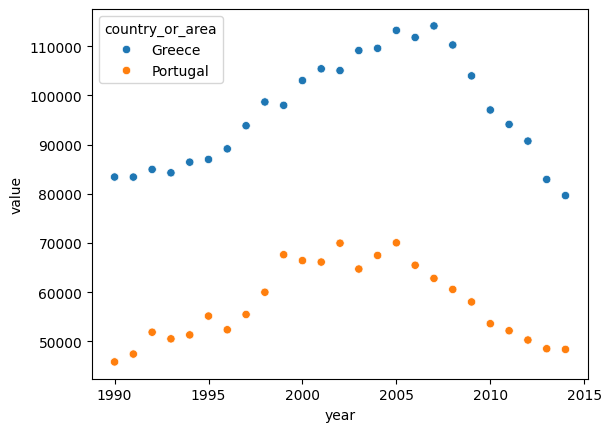

In [47]:
# plot using df_portugal_greece
sns.scatterplot(df_portugal_greece, x='year', y='value', hue='country_or_area')
plt.show()

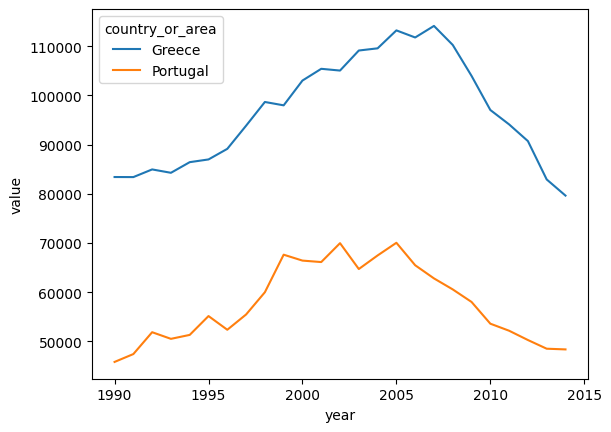

In [48]:
# looking at the data, a lineplot makes more sense:
sns.lineplot(df_portugal_greece, x='year', y='value', hue='country_or_area')
plt.show()

##### Q5 - Carefully analyse the central tendency estimates of GHG emmisions you computed on Q3. Is the relationship between the mean and the median the same between countries? Comment your response taking into account the plot produced in Q4.

Looking at the values column (because the years column is irrelevant - we don't need these values for the years), Greece has much higher values for all central tendency estimates. This is consistent with the graph, which shows much higher values. The peak of emissions appears later for Greece than Portugal. The graph also seems to show that the difference between maximum and minimum values is greater for Greece than for Portugal. 

##### Q6 - Assuming that annual CO<sub>2</sub> GHG emission values follow a normal distribution (even if not necessarily true), which statistical test would be appropriate to compare the values between the Portugal and Greece, given the data characteristics? Define the null hypothesis of the test you want to run, the critical *p-value*, run the test and justify briefly your choice.

In [34]:
# The null hypothesis is that the CO2 GHG emissions between Portugal and Greece do not differ significantly. 
# The critical p-value would be 0.05
# the test to run would be two tailed (as it doesn't matter if it significatly higher or lower)
# Could use Mann-Whitney. It doesn't assume the underlying distribution, so there are likely others that could be chosen, 
# which do assume normal, but as we're not testing that assumption, I have chosen Mann-Whitney

from scipy.stats import mannwhitneyu

alpha = 0.05
statistic, p_value = mannwhitneyu(df_portugal['value'], df_greece['value'])

print('p_value: ')

if p_value < alpha:
    print("The two populations are significantly different (p-value:", p_value, ")")
else:
    print("The two populations are not significantly different (p-value:", p_value, ")")

p_value: 
The two populations are significantly different (p-value: 0.007948018793641865 )


Using this test, we can see that the null hypothesis is rejected, and the two populations have a significantly different distribution at a p-value of 0.05.

##### Q7 - Run an analysis that tests the following null Hypothesis: *H0 - the annual GH Gas Emmision values of Portugal and Greece between 1990 and 2014 follows the same probability distribution*. Use a critical *p-value* of 0.05.

In [33]:
# Same as above. Not sure if it was meant to be run above or not?
from scipy.stats import mannwhitneyu

alpha = 0.05
statistic, p_value = mannwhitneyu(df_portugal['value'], df_greece['value'])

print('p_value: ')

if p_value < alpha:
    print("The two populations are significantly different (p-value:", p_value, ")")
else:
    print("The two populations are not significantly different (p-value:", p_value, ")")

p_value: 
The two populations are significantly different (p-value: 0.007948018793641865 )


Using this test, we can see that the null hypothesis is rejected, and the two populations have a significantly different distribution at a p-value of 0.05.

##### Q8 - Now imagine you wanted to test if GHG emmission values of CO<sub>2</sub>  changed over the years 1990, 1995, 2000, 2005 and 2010 considering all countries with data. Specify the null and alternative hypothesis of the performed test, the critical alpha used as well as the effect sizes. Check also if the direction of changes in the global emmissions were consistent between the time periods.

In [54]:
# create new df from original df, with each year.
df_five_years = df_co2[(df_co2['year']==1990) | 
   (df_co2['year']==1995) | 
   (df_co2['year']==2000) | 
   (df_co2['year']==2005) | 
   (df_co2['year']==2010) 
   ]

df_five_years.head()

# null hypothesis is tha the GHG emission values are not significantly different over these years. 
# Alternative hypothesis is that the GHG emission values are significantly different over these years.
# Critical alpha will be 0.05

# years are categorical, GHG emissions are continuous. Use a one way ANOVA, to see if means are different over the years



,country_or_area,year,value,category
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
9,Australia,2005,385581.132806,carbon_dioxide_co2_emissions_without_land_use_...
14,Australia,2000,349885.433109,carbon_dioxide_co2_emissions_without_land_use_...
19,Australia,1995,305162.543549,carbon_dioxide_co2_emissions_without_land_use_...
24,Australia,1990,278265.898941,carbon_dioxide_co2_emissions_without_land_use_...


In [58]:
from scipy.stats import f_oneway


# Perform ANOVA test
alpha = 0.05
groups = [df_five_years['value'][df_five_years['year'] == name] for name in [1990, 1995, 2000, 2005, 2010]]
statistic, p_value = f_oneway(*groups)

print(f"ANOVA statistic: {statistic:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("There is a significant difference in mean elevation among the 5 years.")
else:
    print("There is no significant difference in mean elevation among the 5 years.")

# Perform pairwise t-tests with Bonferroni correction
from statsmodels.sandbox.stats.multicomp import MultiComparison

# Apply the Bonferroni correction
comparison = MultiComparison(df_five_years['value'], df_five_years['year'])
result = comparison.allpairtest(sts.ttest_ind, method='bonf')

result[0]

ANOVA statistic: 0.008
p-value: 1.000
There is no significant difference in mean elevation among the 5 years.


group1,group2,stat,pval,pval_corr,reject
1990,1995,0.1345,0.8933,1.0,False
1990,2000,0.0864,0.9313,1.0,False
1990,2005,0.0224,0.9822,1.0,False
1990,2010,0.1403,0.8888,1.0,False
1995,2000,-0.0449,0.9643,1.0,False
1995,2005,-0.1079,0.9143,1.0,False
1995,2010,0.0062,0.9951,1.0,False
2000,2005,-0.062,0.9507,1.0,False
2000,2010,0.0508,0.9596,1.0,False
2005,2010,0.1136,0.9098,1.0,False


I am surprised by these results, as this means we should not reject the null hypothesis that there is no significant change throught the years. If I have time, I will try to plot this also to get a better idea of if this appears true on a graph. 